# Homework #4
# CP 5.3, 5.4, 5.7, 5.9, 5.10, 5.11, 5.12, 5.13, 5.19 
Newton Kwan
<br>
Professor Walter
<br>
PHY 566
<br>
19 February 2018 

In [3]:
from numpy import array, empty, linalg, zeros, array_equal, append, insert, identity, linspace, sqrt, pi
from pylab import quiver, plot, imshow, jet
from math import log

In [4]:
from scipy.special.orthogonal import p_roots
from numpy import linspace, cos, tan, ones, copy
from math import sqrt, factorial
from math import pi, exp
import cmath
from numpy.polynomial import Polynomial as P 
from numpy import empty, array, linspace, zeros, loadtxt, sin, cos
from pylab import legend, xlabel, ylabel, title, imshow, plot, xlim, ylim, jet
import matplotlib
from scipy.constants import h, k, hbar, c
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 5.21(a,b) [Electric field of a charge distribution]  [Calculating the electric field by differentiating the potential. Note: one nice way of drawing a vector filed is with the matplotlib ‘quiver’ command (instead of ‘plot’). Also, in case it is ambiguous, once charge should be positive, one negative.

We want to calculate the resulting electric potential on a 1m x 1m square plane surrounding the charges and passing through them. 

We also want to calculate the potential at 1cm spaced points in a grid and make a visualization on the screen of the potential using a density plot. 


$$ \phi_{total} = \frac{q_1}{4\pi\epsilon_0r} + \frac{q_2}{4\pi\epsilon_0r} $$


Are these two points on the plane? 

In [ ]:
# Constants 
epsilon0 = 8.854187817e-12 #F*m^-1 (permitivity of a vacuum)
q1 = 1                     #C (charge)
q2 = -1                    #C (charge)
xi1 = 0.05                 #x1 coord of charge 
yi1 = 0                    #y1 coord of charge 
xi2 = -0.05                #x2 coord of charge 
yi2 = 0                    #y2 coord of charge 

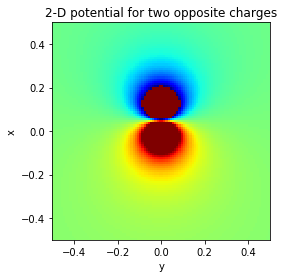

In [623]:
# Calculate the resulting electric potential 

def potential(q, r):
    '''
    The arguements are the charge and the distance r from 
    the charge to the point. This returns 
    the potential at a distance r from the point charge 
    
    divide out by the magnitude if it is past a certain point q
    '''
    return q / (4*pi*epsilon0*r)

# Make the x and y range 

xrange = linspace(-0.5, 0.5, 100) #102 points 
yrange = linspace(-0.5, 0.5, 100) #102 points 
answer = zeros([len(xrange), len(xrange)])

# Insert potential values into the answer array 
for i in range(0, len(xrange)): 
    x = xrange[i]
    for j in range(0, len(yrange)):
        y = yrange[j]
        r1 = sqrt((x - xi1)**2 + (y - yi1)**2)
        r2 = sqrt((x - xi2)**2 + (y - yi2)**2)
        total = potential(q1, r1) + potential(q2, r2)
        
        # For values too large, use a maxvalue 
        maxvalue = 4e10 
        if abs(total) > maxvalue: 
            answer[i, j] = maxvalue
        else: 
            answer[i, j] = total 
        
imshow(answer, extent =[-0.5, 0.5, -0.5, 0.5], origin = "upper")
xlabel("y")
ylabel("x")
title("2-D potential for two opposite charges")
jet()

Calculate the partial derivatives of the potential with respect to x and y and hence find the electric field in the xy plane. 

Make a visualization of the field as well

Our partial derivatives look like this 

$$ \frac{\partial f}{\partial x} = \frac{\frac{q_1}{4\pi \epsilon_0 \sqrt{(x+\frac{h}{2}-x_1)^2 + (y-y_1)^2}} + \frac{q_2}{4\pi \epsilon_0 \sqrt{(x+\frac{h}{2}-x_2)^2 + (y-y_2)^2}} - \frac{q_1}{4\pi \epsilon_0 \sqrt{(x-\frac{h}{2}-x_1)^2 + (y-y_1)^2}} + \frac{q_2}{4\pi \epsilon_0 \sqrt{(x-\frac{h}{2}-x_2)^2 + (y-y_2)^2}}}{h}$$

$$ \frac{\partial f}{\partial y} = \frac{\frac{q_1}{4\pi \epsilon_0 \sqrt{(x-x_1)^2 + (y+\frac{h}{2}-y_1)^2}} + \frac{q_2}{4\pi \epsilon_0 \sqrt{(x{2}-x_2)^2 + (y+\frac{h}{2}-y_2)^2}} - \frac{q_1}{4\pi \epsilon_0 \sqrt{(x-x_1)^2 + (y-\frac{h}{2}-y_1)^2}} + \frac{q_2}{4\pi \epsilon_0 \sqrt{(x-x_2)^2 + (y-\frac{h}{2}-y_2)^2}}}{h}$$

In [16]:
# Constants 
epsilon0 = 8.854187817e-12 # F*m^-1 (permitivity of a vacuum)
q1 = 1.0                    # C (charge)
q2 = -1.0                     # C (charge)
xi1 = 0.05                 # x1 coord of charge 
yi1 = 0.0                    # y1 coord of charge 
xi2 = -0.05                # x2 coord of charge 
yi2 = 0.0                    # y2 coord of charge 
N = 11                     # range 
h = 48.0e-8                  # width 

Text(0.5,1,'Electric Field')

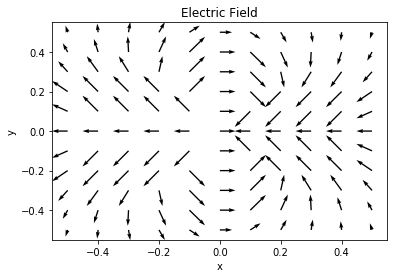

In [17]:
def potential(q, r):
    '''
    The arguements are the charge, the distance r from 
    the charge to the point. This returns the potential 
    at a distance r from a point charge 
    '''
    return q / (4*pi*epsilon0*r)

# Create range for x and y range 
xrange = linspace(-0.5, 0.5, N) 
yrange = linspace(-0.5, 0.5, N) 

# Set up arrays to store E magnitudes 
xmag = zeros((N, N))
ymag = zeros((N, N))

# Loop through each point on the grid 
for i in range(0, len(xrange)): 
    x = xrange[i]
    for j in range(0, len(yrange)):

        y = yrange[j]
        #print("x =", i/100, "y=", j/100)
        # Calculate all the possible r distances 
        
        # r for df/dx 
        r1xplus = sqrt(((x + h/2) - xi1)**2 + (y - yi1)**2)
        r2xplus = sqrt(((x + h/2) - xi2)**2 + (y - yi2)**2)
        r1xminus = sqrt(((x - h/2) - xi1)**2 + (y - yi1)**2)
        r2xminus = sqrt(((x - h/2) - xi2)**2 + (y - yi2)**2)
        print
        
        # r for df/dy 
        r1yplus = sqrt((x - xi1)**2 + ((y + h/2) - yi1)**2)
        r2yplus = sqrt((x - xi2)**2 + ((y + h/2) - yi2)**2)
        r1yminus = sqrt((x - xi1)**2 + ((y - h/2) - yi1)**2)
        r2yminus = sqrt((x - xi2)**2 + ((y - h/2) - yi2)**2)
        
        # Group the terms together 
        firstdx = potential(q1, r1xplus) + potential(q2, r2xplus)
        seconddx = potential(q1, r1xminus) + potential(q2, r2xminus)
        dfdx = (firstdx - seconddx)/h
        
        firstdy = potential(q1, r1yplus) + potential(q2, r2yplus)
        seconddy = potential(q1, r1yminus) + potential(q2, r2yminus)
        dfdy = (firstdy - seconddy)/h
         
        
# Below you will find a few of my failed attempts at
# making the plot look like a dipole =( 
# I was very frustrated 

        
        maxvalue = 9e9
        
        if dfdx != 0 and abs(dfdx) > maxvalue:
            xmag[j,i] = dfdx / abs(dfdx) * maxvalue
        if dfdx != 0 and abs(dfdx) < maxvalue:
            xmag[j,i] = dfdx
        if dfdy != 0 and abs(dfdy) > maxvalue:
            ymag[j,i] = dfdy / abs(dfdy) *maxvalue
        if dfdy != 0 and abs(dfdy) < maxvalue:
            ymag[j,i] = dfdy
        if dfdx == 0: 
            xmag[j,i] = dfdx
        if dfdy == 0:
            ymag[j,i] = dfdy
        
    
        
# Notes about quiver 
# for a given point (x,y), it will match the ith element
# of the x and y values matrix as the magnitudes 
# the way it's set up it is that it will iterate
# as so 
# (x[0], y[0]) = (xval[0, 0], yval[0, 0])
# (x[0], y[1]) = (xval[1, 0], yval[1, 0])
# (x[0], y[2]) = (xval[2, 0], yval[2, 0])
# ... 
# (x[0], y[N]) = (xval[N, 0], yval[N, 0])
#
# (x[1], y[0]) = (xval[0, 1], yval[0, 1]) 
# (x[1], y[1]) = (xval[1, 1], yval[1, 1])
# (x[1], y[2]) = (xval[2, 1], yval[2, 1])
# ... 
# (x[1], y[N]) = (xval[N, 1], yval[N, 1])

quiver(xrange, yrange, xmag, ymag, width = 0.004)
xlabel("x")
ylabel("y")
title("Electric Field")

### 6.1 [Resistor Circuit]

There are four voltages $V_1, V_2, V_3, and V_4$ in a circuit and we are to solve for their values. From Kirchoff's Law, we know that the total net current flow out of any junction in a circuit must be zero. Thus for the junction at voltage $V_1$, for instance, we have 

$$\frac{V_1 - V_2}{R} + \frac{V_1 - V_3}{R} + \frac{V_1 - V_4}{R} + \frac{V_1 - V_+}{R} = 0$$

or equivalently 

$$4V_1 - V_2 - V_3 - V_4 = V_+$$

Subsequently, the three other equations are 

$$-V_1 + 3V_2 + 0V_3 - V_4 = 0$$

$$-V_1 + 0V_2 + 3V_3 - V_4 = V_+$$

$$-V_1 -V_2 - V_3 + 4V_4 = 0$$ 

where $V+ = 5V$

In [795]:
# Define Constants 
A = array( [[4, -1, -1, -1], 
            [-1, 3, 0, -1], 
            [-1, 0, 3, -1], 
            [-1, -1, -1, 4]], float)
v  = array([5, 0, 5, 0], float)
N = len(v) #number of rows and columns

In [796]:
#example of Gaussian elimination with backsubstitution 

for m in range(N): 
    
    # Divide by the diagonal element 
    div = A[m, m]
    A[m,:] /= div 
    v[m] /= div
    
    # Now subtract from the lower rows 
    for i in range(m+1, N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]
        
# Backsubstitution 
x = empty(N, float)
for m in range(N-1, -1, -1): 
    x[m] = v[m]
    for i in range(m+1, N):
        x[m] -= A[m, i]*x[i]
    
print("V1 =", x[0])
print("V2 = {:.2f}" .format(x[1]))
print("V3 = {:.2f}" .format(x[2]))
print("V4 =", x[3])

V1 = 3.0
V2 = 1.67
V3 = 3.33
V4 = 2.0


### 6.2 [Partial Pivoting]

One problem that we may run into when solving systems of equations is when the first element of the first row of our matrix could be 0. The problem is that our gausselim.py program only works by dividing by this first value. We cannot divide by 0, so we use a work around called pivoting. The idea is to look at each row below the current row and swap the current row with the row that has the highest value in the first column.

In [797]:
# Define constants 

A = array( [[2, 1, 4, 1], 
            [3, 4, -1, -1], 
            [1, -4, 1, 5], 
            [2, -2, 1, 3]], float)
v  = array([-4, 3, 9, 7], float)
N = len(v) #number of rows and columns

In [798]:
#Gaussian elimination with partial pivoting 
for m in range(N): 
        
    # Partial pivoting 
    for k in range(m, N):
        if abs(A[k, m]) > abs(A[m, m]): 
            
            # Swap rows 
            A[[m, k]] = A[[k, m]] 
            v[m],v[k] = v[k],v[m] 
            break
    
    # Divide by the diagonal element 
    div = A[m, m]
    A[m,:] /= div 
    v[m] /= div
        
    # Now subtract from the lower rows 
    for i in range(m+1, N):
            
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution 
x = empty(N, float)
for m in range(N-1, -1, -1): 
    x[m] = v[m]
    for i in range(m+1, N):
        x[m] -= A[m, i]*x[i]
    
print("w = {:.1f}" .format(x[0]))
print("x = {:.1f}" .format(x[1]))
print("y = {:.1f}" .format(x[2]))
print("z = {:.1f}" .format(x[3]))
print("This matches Ex 6.1")

w = 2.0
x = -1.0
y = -2.0
z = 1.0
This matches Ex 6.1


We now use our partial pivoting program to solve equation 6.17, which will fail if we don't use partial pivoting. 

In [799]:
#Gaussian elimination with partial pivoting 
A = array( [[0, 1, 4, 1], 
            [3, 4, -1, -1], 
            [1, -4, 1, 5], 
            [2, -2, 1, 3]], float)
v  = array([-4, 3, 9, 7], float)
N = len(v) #number of rows and columns

In [800]:
#Gaussian elimination with partial pivoting 
for m in range(N): 
        
    # Partial pivoting 
    for k in range(m, N):
        if abs(A[k, m]) > abs(A[m, m]): 
            
            # Swap rows 
            A[[m, k]] = A[[k, m]] 
            v[m],v[k] = v[k],v[m] 
            break
    
    # Divide by the diagonal element 
    div = A[m, m]
    A[m,:] /= div 
    v[m] /= div
        
    # Now subtract from the lower rows 
    for i in range(m+1, N):
            
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution 
x = empty(N, float)
for m in range(N-1, -1, -1): 
    x[m] = v[m]
    for i in range(m+1, N):
        x[m] -= A[m, i]*x[i]
        

print("w = {:.4f}" .format(x[0]))
print("x = {:.4f}" .format(x[1]))
print("y = {:.4f}" .format(x[2]))
print("z = {:.4f}" .format(x[3]))
print("We could not have solved this without pivoting")

w = 1.6190
x = -0.4286
y = -1.2381
z = 1.3810
We could not have solved this without pivoting


### 6.3 (a,b) [LU decomposition]

This exercise will use LU decomposition to solve simultaneous equations. 

In [6]:
# Define constants 
A = array( [[2, 1, 4, 1], 
            [3, 4, -1, -1], 
            [1, -4, 1, 5], 
            [2, -2, 1, 3]], float)
v  = array([-4, 3, 9, 7], float)
N = len(v) #number of rows and columns

In [7]:
print("Initial A")
print(A)
print()

def LU(A, v, N):
    
    '''
    This function performs an LU decomposition 
    for a given matrix A and returns the solution 
    of Ax = v using LU decomposition 
    '''
    
    #initialize L 
    L = zeros((N, N)) 
    L[:, 0] = A[:,0] #column of a_m0's
    
    #Gaussian elimination 
    for m in range(N): 
        # Divide by the diagonal element 
        div = A[m, m]
        A[m,:] /= div 
        v[m] /= div
        
        # Now subtract from the lower rows 
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
        
        # Filling L 
        if m < N-1: 
            L[m+1:,m+1] = A[m+1:, m+1]
            
    #Upper triangular matrix, U
    U = A
    
    # Double Backsubstitution 
    # Ly = v
    y = empty(N, float)
    for m in range(N-1, -1, -1): 
        y[m] = v[m]
        for i in range(m+1, N):
            y[m] -= L[m, i]*y[i]
        
    # Ux = y
    x = empty(N, float)
    for m in range(N-1, -1, -1): 
        x[m] = y[m]
        for i in range(m+1, N):
            x[m] -= U[m, i]*x[i]
    
    # Useful information 
    print("This is A after GE")
    print(A)
    print()
    print("This is L")
    print(L)
    print()
    print("This is U, which is equal to A after GE")
    print(U)
    print()
    LU = L.dot(U)
    print("This is LU")
    print(LU)
    print()
    print()
    print("LU is indeed equal to A, confirming")
    print("that the LU decomposition works")
    print()
    
    return(x)

answer = LU(A, v, N)
print("Using LU decomposition")
print()
print("v1 =", answer[0])
print("v2 = {:.2f}" .format(answer[1]))
print("v3 = {:.2f}" .format(answer[2]))
print("v4 =", answer[3])
print()

# Using numpy.solve to solve the same problem 

A = array( [[2, 1, 4, 1], 
            [3, 4, -1, -1], 
            [1, -4, 1, 5], 
            [2, -2, 1, 3]], float)
v  = array([-4, 3, 9, 7], float)

#takes coefficient matrix and answer 
x = linalg.solve(A, v)

print("Using numpy.solve:")
print()
print("v1 =", x[0])
print("v2 = {:.2f}" .format(x[1]))
print("v3 = {:.2f}" .format(x[2]))
print("v4 =", x[3])
print()
print("We verify that we get the same answer either way")

Initial A
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]

This is A after GE
[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]]

This is L
[[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]]

This is U, which is equal to A after GE
[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]]

This is LU
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]


LU is indeed equal to A, confirming
that the LU decomposition works

Using LU decomposition

v1 = 2.0
v2 = -1.00
v3 = -2.00
v4 = 1.0

Using numpy.solve:

v1 = 2.0
v2 = -1.00
v3 = -2.00
v4 = 1.0

We verify that we get the same answer either way


### 6.4 [Same as 6.1 but use ‘solve’ from numpy]

We use the built in python function numpy.linalg.solve to solve a system of equations. 

In [93]:
A = array( [[4, -1, -1, -1], 
            [-1, 3, 0, -1], 
            [-1, 0, 3, -1], 
            [-1, -1, -1, 4]], float)
v  = array([5, 0, 5, 0], float)

#takes coefficient matrix and answer 
x = linalg.solve(A, v)

print("V1 =", x[0])
print("V2 = {:.2f}" .format(x[1]))
print("V3 = {:.2f}" .format(x[2]))
print("V4 =", x[3])
print("These are the same values as 6.1")

V1 = 3.0
V2 = 1.67
V3 = 3.33
V4 = 2.0
These are the same values as 6.1


# 6.7 [More circuits. Use the fact that the matrix A is banded in part b) also so you can use the same program in part c.] 

Banded matrix: a  matrix where the non-zero terms are along the diagonal or along a strip down the diagonal. Plot the results (internal voltage vs internal point)

There is a long chain of resistors and the problem is find the voltages $V_1 ... V_N$ at the internal points in the circuit.

We express the system of equations into matrix form Av = w 


$$3V1 - V_2 - V3          = V_+$$
$$-V_1 - 4V_2 - V_3 - V_4 = V_+$$
$$\vdots $$
$$-V_{i-2} - V_{i-1} + 4V_i - V_{i+1} - V_{i+2} = 0$$
$$\vdots$$ 
$$-V_{N-3} - V_{N-2} + 4V_{N-1} - V_N = 0$$
$$-V_{N-2} - V_{N-1} + 3V_N = 0$$ 


This can written as a banded matrix, A 

$$
\begin{bmatrix}
    3 & -1 & -1 & 0  & \dots & \dots & \dots & \dots & 0\\
    -1 & 4 & -1 & -1 & 0 & \dots  & \dots & \dots & 0\\
    -1 & -1 & 4 & -1 & -1 & 0 & \dots & \dots & 0\\
    0 & -1 & -1 & 4 & -1 & -1 & 0 & \dots & 0 \\
    \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
    0 & \dots & 0 & -1 & -1 &  4 & -1 & -1 & 0\\ 
    0 & \dots & \dots  & 0 & -1 &  -1 & 4 & -1 & -1\\ 
    0 & \dots & \dots & \dots & 0 &  -1 & -1 & 4  & -1 \\ 
    0 & \dots & \dots& \dots & \dots & 0 & -1 & -1  & 3
\end{bmatrix}
\begin{bmatrix}
    v_1 \\
    v_2 \\ 
    \vdots \\
    \vdots \\ 
    \vdots \\ 
    \vdots \\ 
    \vdots \\ 
    v_{N-1} \\ 
    v_N
\end{bmatrix}
=
\begin{bmatrix}
    V_+ \\
    V_+ \\ 
    0 \\ 
    0 \\ 
    \vdots \\ 
    \vdots \\ 
    \vdots \\ 
    0 \\ 
    0
\end{bmatrix}
$$



In [39]:
def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]
        #print("This is div", div)

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

In [41]:
# Constants 
N = 6
A = zeros((N, N))

# Create the matrix A to confirm correct results 

'''
A = array([[3, -1, -1, 0, 0, 0], 
          [-1, 4, -1, -1, 0, 0], 
          [-1, -1, 4, -1, -1, 0], 
          [0, -1, -1, 4, -1, -1],
          [0, 0, -1, -1, 4, -1],
          [0, 0, 0, -1, -1, 3]])
'''

up = 2
down = 2 
for i in range(N):
    if i == 0: 
        A[0, 0] = 3
        A[0, 1] = -1
        A[0, 2] = -1
    if i == 1: 
        A[1, 0] = -1
        A[1, 1] = 4 
        A[1, 2] = -1 
        A[1, 3] = -1 
    if i == 2:
        A[2, 0] = -1 
        A[2, 1] = -1 
        A[2, 2] = 4 
        A[2, 3] = -1 
        A[2, 4] = -1 
    if i > 2 and i < N-2: 
        A[i, i-2] = -1 
        A[i, i-1] = -1 
        A[i, i] = 4 
        A[i, i+1] = -1 
        A[i, i+2] = -1 
    if i == N-2:
        A[N-2, N-1] = -1 
        A[N-2, N-2] = 4
        A[N-2, N-3] = -1 
        A[N-2, N-4] = -1 
    if i == N-1: 
        A[N-1, N-1] = 3 
        A[N-1, N-2] = -1 
        A[N-1, N-3] = -1

# Set up the initial values of the arrays 

Aa = empty([1+up+down, N], float)
Aa[0, :] = -1 
Aa[1, :] = -1 
Aa[2, :] = 4 
Aa[3, :] = -1
Aa[4, :] = -1 
Aa[2, 0] = 3 
Aa[2, N-1] = 3 
v = zeros(N)
v[0] = 5
v[1] = 5

answer = banded(Aa, v, up, down)
print("This is the special matrix A")
print(Aa)
print()
print("This is v")
print(v)
print()
print("This is the size of A")
print(N)
print()
print("This is solution for N =", N)
print(answer)
print()

This is the special matrix A
[[-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [ 3.  4.  4.  4.  4.  3.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]]

This is v
[ 5.  5.  0.  0.  0.  0.]

This is the size of A
6

This is solution for N = 6
[ 3.7254902   3.43137255  2.74509804  2.25490196  1.56862745  1.2745098 ]



We solve the same problem now, but with N = 10000

This is the special matrix A
[[ 3. -1. -1.  0.  0.  0.]
 [-1.  4. -1. -1.  0.  0.]
 [-1. -1.  4. -1. -1.  0.]
 [ 0. -1. -1.  4. -1. -1.]
 [ 0.  0. -1. -1.  4. -1.]
 [ 0.  0.  0. -1. -1.  3.]]

This is v
[ 5.  5.  0. ...,  0.  0.  0.]

This is the size of A
10000

This is solution for N = 10000
[  4.99888228e+00   4.99861842e+00   4.99802841e+00 ...,   1.97158611e-03
   1.38158071e-03   1.11772227e-03]


Text(0.5,1,'Voltage vs internal points')

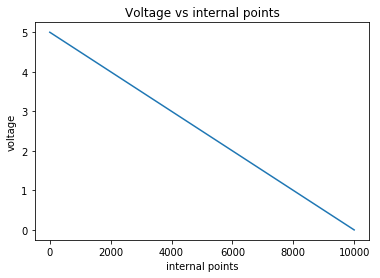

In [43]:
#Constants 
N = 10000
# Set up the initial values of the arrays 

Aa = empty([1+up+down, N], float)
Aa[0, :] = -1 
Aa[1, :] = -1 
Aa[2, :] = 4 
Aa[3, :] = -1
Aa[4, :] = -1 
Aa[2, 0] = 3 
Aa[2, N-1] = 3 
v = zeros(N, float)
v[0] = 5
v[1] = 5

answer = banded(Aa, v, up, down)
print("This is the special matrix A")
print(A)
print()
print("This is v")
print(v)
print()
print("This is the size of A")
print(N)
print()
print("This is solution for N =", N)
print(answer)

plot(answer)
xlabel("internal points")
ylabel("voltage")
title("Voltage vs internal points")

### 6.8 parts b and c [The QR algorithm]

For N x N matrix A 

We can decompose a matrix A in to QR, which is helpful in finding eigenvalues and eigenvectors 

1) Create N x N V and set V = I 
2) Do QR decomp. A = QR. Choose some epsilon > 0 
3) make new A' = RQ (equivalent Q^TAQ, Q^T(QR)Q
4) set V = VQ, now contains eigenvalues and V has eigenvectors
5) check magnitude of off diagonals all < epsilon. if not, go back to 2 

In [805]:
# Create an N x N matrix V to hold the eigenvectors 

print("Part b")
print()
N = 4
A = array([[1., 4., 8., 4.],
           [4., 2., 3., 7.], 
           [8., 3., 6., 9.], 
           [4., 7., 9., 2.]])

print("This is A")
print(A)
print()

def QRdecomp(A, N): 
    '''
    This will return the QR decompostion 
    of a square matrix A 
    '''
    
    # Define Q 
    Q = zeros((N, N))
    
    # Define R 
    R = zeros((N, N))
    
    # Defining u's and q's 
    
    for i in range(0, N, 1): 
        # Define ai, ui, uimag, qi 
        
        # Initialize append 
        append = 0 
        
        # Define ai
        ai = A[:,i]
        
        # Initialize ui with a copy 
        # bc it normally has a pointer 
        ui = copy(ai) 
        
        # put norm of u0 into R for i == 0
        if i == 0:
            R[0, 0] = linalg.norm(ui)
        
        # Define append part of ui 
        for j in range(0, i, 1):
            qi = Q[:, j]
            dot = qi.dot(A[:, i])
            R[j, i] = dot
            append = dot * qi
            ui -= append
            if j == i-1: 
                R[j+1, j+1] = linalg.norm(ui)
     
        # Define qi + insert into Q
        qi = ui / linalg.norm(ui)
        Q[:, i] = qi 
    
    return Q, R

answer = QRdecomp(A, N)
print("This is Q")
print(answer[0])
print()
print("This is R")
print(answer[1])
print()
print("This is QR")
print(answer[0].dot(answer[1]))
print()
print("We verify QR = A")
print()


print("Part c")
print()

def eigens(A, error, N):
    '''
    This computes the eigenvalues and eigenvectors
    of a real symmetrix matrix using the QR algorithm 
    '''
    
    # Initialize N x N matrix V to hold eigenvectors
    V = identity(N)
    
    # Initialize threshold 
    threshold = False 
    
    # Non-diagonal elements > error:
    while (threshold == False):
    
        # Compute QR decomposition of matrix A  
        Q = QRdecomp(A, N)[0]
        R = QRdecomp(A, N)[1]
        
        # Update A to the new value A = RQ 
        A = R.dot(Q)
        
        # Multiply V on the right by Q 
        V = V.dot(Q)
        
        # Checks off diagonals 
        for i in range(0, N):
            #print(A[i, :])
            
            for j in range(0, N):
                
                if i != j: 
                    #print("This is on an off diagonal")
                    #print(A[i, j])
                    
                    if A[i, j] > error:
                        break 
                        
            else: 
                threshold = True 
                continue # executed if the loop ended normally (no break)
                      
            break # executed if 'continue' was skipped (break)
           
        
    
    return A, V
    
# Symmetric matrix A 
Anew = array([[1., 4., 8., 4.],
           [4., 2., 3., 7.], 
           [8., 3., 6., 9.], 
           [4., 7., 9., 2.]])

# Set desired error 
error = 10e-6

answer = eigens(Anew, error, N)
print("This is A")
print(answer[0])
print()
print("The eigvenvalues of A are on the diagonal:")
print(answer[0].diagonal())
print()
print("The eigenvectors are the columns of V")
print(answer[1])

Part b

This is A
[[ 1.  4.  8.  4.]
 [ 4.  2.  3.  7.]
 [ 8.  3.  6.  9.]
 [ 4.  7.  9.  2.]]

This is Q
[[ 0.10153462  0.558463    0.80981107  0.1483773 ]
 [ 0.40613847 -0.10686638 -0.14147555  0.8964462 ]
 [ 0.81227693 -0.38092692  0.22995024 -0.37712564]
 [ 0.40613847  0.72910447 -0.5208777  -0.17928924]]

This is R
[[  9.8488578    6.49821546  10.55960012  11.37187705]
 [  0.           5.98106979   8.4234836   -0.484346  ]
 [  0.           0.           2.74586406   3.27671222]
 [  0.           0.           0.           3.11592335]]

This is QR
[[ 1.  4.  8.  4.]
 [ 4.  2.  3.  7.]
 [ 8.  3.  6.  9.]
 [ 4.  7.  9.  2.]]

We verify QR = A

Part c

This is A
[[  2.10000000e+01   5.07196854e-06   8.68935997e-13  -1.99259480e-14]
 [  5.07196855e-06  -8.00000000e+00   4.25983266e-07   6.18987668e-14]
 [  8.64229500e-13   4.25983271e-07  -3.00000000e+00  -1.85844586e-07]
 [  2.50956832e-20   6.13541802e-14  -1.85844585e-07   1.00000000e+00]]

The eigvenvalues of A are on the diagonal:
[ 

### 6.9 parts a, b and c [Asymmetric Quantum Well. For part b) write a function to use in part c. For doing the QM calculation in parts a) and b) if you wish you can do the math separately in LaTeX and submit a separate PDF. But, you should be able to do it in the notebook.]

Given an asymmetric quantum well, the potential V(x) varies somehow inside the well. This cannot be solved analytically, so we must resort to numerical methods. 

In a pure state of energy E , the spatial part $\psi(x)$ of the wavefunction obeys the time-independent Schrodinger equation $\hat{H}$

$$\hat{H} = -\frac{\hbar^2}{2M} \frac{d^2}{dx^2} + V(x)$$

The wavefunction can be expressed as a Fourier sine series: 

$$\psi(x) = \sum_{n=1}^{\infty}\psi_{n}sin{\frac{\pi n x}{L}},$$

where $\psi_1, \psi_2,$ are the Fourier coefficients 

The states of the wavefunction are orthogonal and know that the following relation is true: 

$$\int_{0}^{L}sin{\frac{\pi n x}{L}}sin{\frac{\pi m x}{L}} 
= 
\begin{cases}
\frac{L}{2}, & \text{if}\ m =n, \\
0, & \text{otherwise}
\end{cases}$$ 

From 

$$\hat{H}\psi = E\psi$$ 

Substitute in our definition of $\psi$

$$\hat{H}\sum_{n=1}^{\infty}\psi_{n}sin{\frac{\pi n x}{L}} = E\sum_{n=1}^{\infty}\psi_{n}sin{\frac{\pi n x}{L}}$$ 

Multiply both sides by $sin{\frac{\pi m x}{L}}$

$$\hat{H}\sum_{n=1}^{\infty}\psi_{n}sin{\frac{\pi n x}{L}}sin{\frac{\pi m x}{L}} = E\sum_{n=1}^{\infty}\psi_{n}sin{\frac{\pi n x}{L}}sin{\frac{\pi m x}{L}}$$ 

Integrate from 0 to L 

$$\int_{0}^{L}\hat{H}\sum_{n=1}^{\infty}\psi_{n}sin{\frac{\pi n x}{L}}sin{\frac{\pi m x}{L}} = \int_{0}^{L}E\sum_{n=1}^{\infty}\psi_{n}sin{\frac{\pi n x}{L}}sin{\frac{\pi m x}{L}}$$ 

With some clever rearranging, we can write this in a familar form 

$$\sum_{n=1}^{\infty}\psi_{n}\int_{0}^{L}sin{\frac{\pi n x}{L}}\hat{H}sin{\frac{\pi m x}{L}} = \int_{0}^{L}sin{\frac{\pi n x}{L}}sin{\frac{\pi m x}{L}}E\sum_{n=1}^{\infty}\psi_{n}$$ 

Since all of the terms in the sum go to 0 except when m = n, we can substitute our orthogonality relationship and replace $\psi_{n}$ with $\psi_{m}$ on the right side. We arrive at our answer: 

$$\sum_{n=1}^{\infty}\psi_{n}\int_{0}^{L}sin{\frac{\pi n x}{L}}\hat{H}sin{\frac{\pi m x}{L}} = \frac{1}{2}LE\psi_{m} \tag{1}$$ 

Next, we can define a matrix $\textbf{H}$ with elements 

$$H_{mn} = \frac{2}{L}\int_{0}^{L}sin\bigg(\frac{\pi m x}{L}\bigg)\bigg[-\frac{\hbar^2}{2M}\frac{d^2}{dx^2} + \frac{ax}{L}\bigg]sin\bigg(\frac{\pi n x}{L}dx\bigg)$$

Using equation $(1)$, we can write Schrodinger's equation as in matrix form 

$$\bf{H}\bf{\psi} = \text{E}\bf{\psi}$$

### part b 

For the case $V(x) = \frac{ax}{L}$, we substitute the Hamiltonian H and we evaulate the integral in $H_{mn}$ analytically and find a general expression for the matrix element $H_{mn}$. 

$$H_{mn} = \frac{2}{L}\int_{0}^{L}sin\bigg(\frac{\pi m x}{L}\bigg)\bigg[-\frac{\hbar^2}{2M}\frac{d^2}{dx^2} + \frac{ax}{L}\bigg]sin\bigg(\frac{\pi n x}{L}dx\bigg)$$

Applying the H operator (part in brackets) to the right side, we get 

$$\frac{\pi^2 n^2 \hbar^2}{ML^3} \int_{0}^{L}sin\bigg(\frac{\pi m x}{L}\bigg)sin\bigg(\frac{\pi n x}{L}\bigg)dx + \frac{2a}{L^2}\int_{0}^{L}x sin\bigg(\frac{\pi m x}{L}\bigg)sin\bigg(\frac{\pi n x}{L}\bigg)dx $$

Using the following properties from earlier: 

$$\int_{0}^{L}sin{\frac{\pi n x}{L}}sin{\frac{\pi m x}{L}} 
= 
\begin{cases}
\frac{L}{2}, & \text{if}\ m =n, \\
0, & \text{otherwise}
\end{cases}
$$ 

$$\int_{0}^{L}xsin{\frac{\pi n x}{L}}sin{\frac{\pi m x}{L}} 
= 
\begin{cases}
0, & \text{if}\ m \neq n, \text{and}\ m , n \text{ are both even or both odd}\\
-\big(\frac{2L}{\pi}\big)^2 \frac{mn}{(m^2 - n^2)^2}, & \text{if}\ m \neq n \text{ and one is even, one is odd,} \\
\frac{L^2}{4} & \text{if}\ m = n 
\end{cases}
$$ 

This matrix is has no complex components, so it must be real. The matrix is symmetric with the values when m = n down the diagonal and $m \neq n$ and one is even, one is odd, on the diagonals going from bottom left to upper right. For n,m = 5, the matrix might look something like this: 

\begin{equation}
H_{mn}
=
\begin{bmatrix}
    a + c & b & 0 & b & 0\\
    b & a + c & b & 0 & b\\
    0 & b & a+c & b & 0\\
    b & 0 & b & a + c & b\\
    0 & b & 0 & b & a+c\\
\end{bmatrix}
\end{equation}

In [45]:
# Define Constants 
M = 9.1094e-31 #kg (mass of electron)
q = 1.6022e-19 #C (charge of electron)
a = 1.6022e-18 #J (value of a) equivalent to 10eV
L = 5.0e-10 #meters (width of well)
hbar = 1.054e-34 #J * s (Planck's constant / 2pi )
N = 10
H = zeros((N, N))

In [46]:
# Program that evaluates the expression for Hmn for aribitrary m and n 

for n in range(1, N+1, 1):
    for m in range(1, N+1, 1):
        if n == m:
            # Eigenvalues on diagonals 
            # The a/2 term dominates (But that's probably not right)
            
            answer = (((pi**2) * (n**2) * (hbar**2)) / (2*M*(L**2))) + (a/2) 
            H[n-1, m-1] = answer
          
        if n != m:
            #if n % 2 == 0 and m % 2 == 0: 
                #print("n != m; n and m even")
            #if n % 2 != 0 and m % 2 != 0: 
                #print("n != m; n and m odd")
            if n % 2 != 0 and m % 2 == 0:
                H[n-1, m-1] = -(8 * m * n * a) / ((pi**2) * (m**2 - n**2)**2)
            if n % 2 == 0 and m % 2 != 0:
                #print("n != m; n even, m odd")
                H[n-1, m-1] = -(8 * m * n * a) / ((pi**2) * (m**2 - n**2)**2)
                

x = linalg.eigvalsh(H)
#divide by this go from J to eV
conversion = 1.60218e-19
#print(H)

for i in range(0, len(x), 1):
    converted = x[i] / conversion
    print("n =", i+1, "eigenvalue:")
    print(converted, "eV")
    print()

n = 1 eigenvalue:
5.83415559327 eV

n = 2 eigenvalue:
11.1747007643 eV

n = 3 eigenvalue:
18.6483602253 eV

n = 4 eigenvalue:
29.1181623189 eV

n = 5 eigenvalue:
42.6142814666 eV

n = 6 eigenvalue:
59.1264454785 eV

n = 7 eigenvalue:
78.649262103 eV

n = 8 eigenvalue:
101.180831154 eV

n = 9 eigenvalue:
126.718907588 eV

n = 10 eigenvalue:
155.391894911 eV



### 6.16 [Lagrange Point. Use the secant method. The distance to the L1 point is 326045 km]

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satelite 

The two are pulling in opposite directions and sum to the exactly equal the centripetal force needed to keep the satelite in orbit 

$$ F_{Earth} - F_{Moon} = F_{Centripetal} $$

$$ \frac{GMm_s}{r^2} - \frac{Gmm_s}{(R - r)^2} =\frac{m_sv^2}{r}$$

Dividing out the mass of the satelite $m_s$ and substituting $v = r\omega$, we get 

$$ \frac{GM}{r^2} - \frac{Gm}{(R - r)^2} = \omega^2r$$

In [325]:
# Define constants 
G = 6.674e-11 #m^3kg^-1s^-2 Gravitational constant
M = 5.974e24 #kg mass of Earth
m = 7.348e22 #kg mass of Moon
R = 3.844e8 #m distance from Earth to Moon
w = 2.662e-6 #s^-1 angular velocity of satellite  

In [359]:
# We will solve for the distance r from the Earth to the L1 point. 

def f(r): 
    '''
    This is the non-linear equation
    we are trying to solve 
    '''
    return (G*M / r**2) - (G*m / (R-r)**2) - (w**2)*r

def secant(): 
    '''
    this function will return the distance 
    r from the Earth to L1 
    '''
    
    # pick two values of r
    
    # we know it's somewhere between 
    # 0 and 3.844e8 and it's probably a 
    # little closer to the moon 
    
    # r1 and r2
    ri = 5.0e4
    rinext = 5.0e7
    
    for i in range(16): 
        #Throws divide by zero error when i > 16 
        
        r = rinext - f(rinext) * (rinext - ri) / (f(rinext) - f(ri))
        ri = rinext 
        rinext = r 
     
    return r

answer = secant()
print("The distance r from Earth to L1 is {:.6g}" .format(answer))

The distance r from Earth to L1 is 3.26045e+08
